In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We will create a dataset that looks like an export from an Accounting System
data = {
    'description': [
        'Dell Latitude 5000 Laptop', 'Lenovo ThinkPad X1', 'MacBook Pro M1', 'iPad Air 5th Gen',
        'Logitech MX Master Mouse', 'Dell UltraSharp Monitor', 'HDMI Cable 10ft', 'USB-C Hub Anker',
        'Herman Miller Aeron Chair', 'Standing Desk Motorized', 'Mesh Office Chair', 'Metal Filing Cabinet',
        'Copy Paper A4 Case', 'Ballpoint Pens Blue', 'Sticky Notes Yellow', 'Stapler Heavy Duty',
        'Janitorial Services Jan', 'Office Cleaning Feb', 'Window Washing Service', 'Carpet Cleaning',
        'McKinsey Strategy Consult', 'Legal Services Contract', 'Financial Audit FY23', 'Tax Advisory',
        'LinkedIn Talent Solutions', 'Google Ads Q1', 'Facebook Marketing', 'SEO Agency Retainer',
        'Uber Ride to Airport', 'Delta Flight JFK-LHR', 'Hilton Hotel Stay', 'Client Dinner'
    ],
    'cost': [
        1200, 1400, 2500, 600,
        90, 300, 20, 45,
        1200, 700, 200, 150,
        50, 12, 8, 15,
        500, 500, 300, 250,
        15000, 5000, 8000, 3500,
        2000, 4500, 1500, 3000,
        55, 1200, 400, 250
    ],
    'category': [
        'IT Hardware', 'IT Hardware', 'IT Hardware', 'IT Hardware',
        'IT Hardware', 'IT Hardware', 'IT Hardware', 'IT Hardware',
        'Office Furniture', 'Office Furniture', 'Office Furniture', 'Office Furniture',
        'Office Supplies', 'Office Supplies', 'Office Supplies', 'Office Supplies',
        'Facilities', 'Facilities', 'Facilities', 'Facilities',
        'Professional Services', 'Professional Services', 'Professional Services', 'Professional Services',
        'Marketing', 'Marketing', 'Marketing', 'Marketing',
        'Travel', 'Travel', 'Travel', 'Travel'
    ]
}

# Convert to a nice table
df = pd.DataFrame(data)

# Show the first 5 rows
df.head()

,description,cost,category
0,Dell Latitude 5000 Laptop,1200,IT Hardware
1,Lenovo ThinkPad X1,1400,IT Hardware
2,MacBook Pro M1,2500,IT Hardware
3,iPad Air 5th Gen,600,IT Hardware
4,Logitech MX Master Mouse,90,IT Hardware


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 1. Prepare Data
X = df['description'] # The Text
y = df['category']    # The Label

# 2. Split into Training (to learn) and Testing (to check)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the AI Pipeline
# TfidfVectorizer = Turns text into numbers (math)
# RandomForest = The logic engine
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100))
])

# 4. Train the model
model.fit(X_train, y_train)
print("✅ AI Model has been trained successfully!")

✅ AI Model has been trained successfully!


In [4]:
# Imagine this is a new file from a messy employee expense report
new_data = [
    'HP Spectre Laptop', 
    'Uber trip to meeting', 
    'Legal fees for contract', 
    'Box of Paper Clips', 
    'Instagram Ad Campaign'
]

# Ask the model to predict
predicted_categories = model.predict(new_data)

# Show results nicely
results = pd.DataFrame({
    'Expense Description': new_data,
    'AI Prediction': predicted_categories
})

results

,Expense Description,AI Prediction
0,HP Spectre Laptop,IT Hardware
1,Uber trip to meeting,Travel
2,Legal fees for contract,Professional Services
3,Box of Paper Clips,IT Hardware
4,Instagram Ad Campaign,IT Hardware


C:\Users\black\AppData\Local\Temp\ipykernel_74448\4154375204.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spend_chart.values, y=spend_chart.index, palette='viridis')


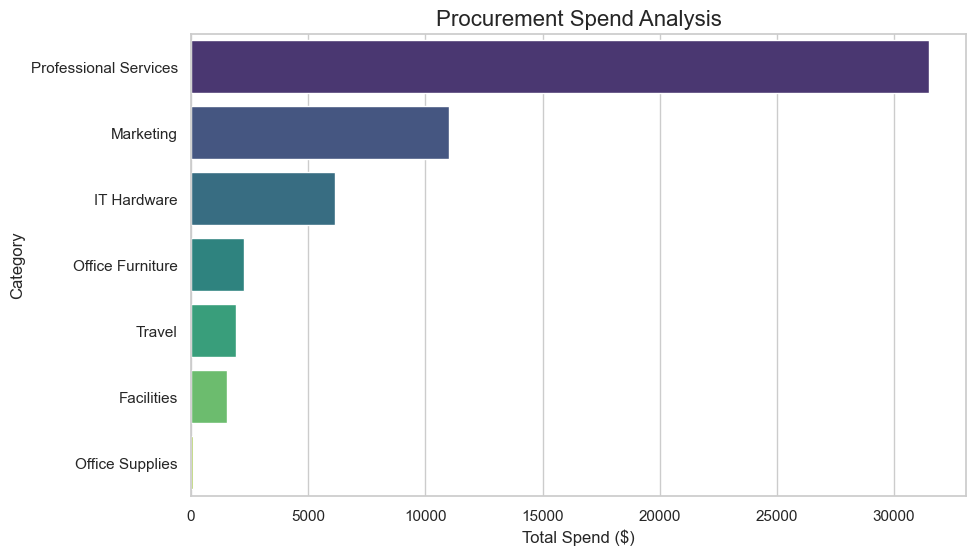

In [5]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Calculate total spend per category
spend_chart = df.groupby('category')['cost'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=spend_chart.values, y=spend_chart.index, palette='viridis')

plt.title('Procurement Spend Analysis', fontsize=16)
plt.xlabel('Total Spend ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()